In [ ]:
#Cell Number 1

#Mount google drive to access dataset from google drive
 
from google.colab import drive
drive.mount('/content/drive')

# New Section

[13:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


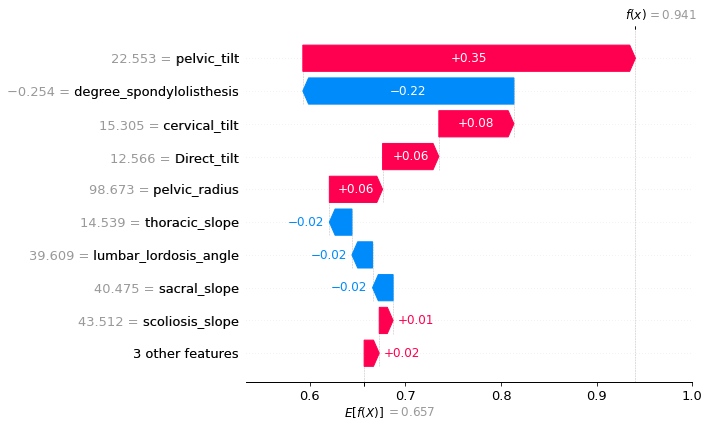

In [ ]:
# imports
#!pip install shap

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split


import xgboost


import shap



data = pd.read_csv('/content/drive/MyDrive/Backbone/Dataset_spine.csv')


X = data.iloc[:,0:-1] 
Y = (data['Class_att'] == "Abnormal")  


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)


model = xgboost.XGBRegressor().fit(X_train, y_train)


explainer = shap.Explainer(model)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])